1.	Take grayscale image of size 512x512 and perform the following operations:

    (c)	Illustrate the histogram of the image and make single threshold segmentation observed from the histogram.


In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


image = cv.imread('img.jpg', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (512, 512))

In [17]:
def generateHistogram(image):
    histogram = np.zeros(256)
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            histogram[image[i, j]] += 1
    return histogram

### Basic Global Thresholding Algorithm

In [18]:
def global_threshold(image):
    # Step 1: Select an initial estimate for T (average gray level of the image)
    threshold = np.mean(image)

    # Step 2: Segment the image into two groups: G1 and G2
    while True:
        # Create two groups: G1 (pixels > T) and G2 (pixels ≤ T)
        G1 = image[image > threshold]
        G2 = image[image <= threshold]

        # Step 3: Compute the average gray levels of G1 and G2
        if len(G1) > 0:
            mu1 = np.mean(G1)
        else:
            mu1 = 0
        if len(G2) > 0:
            mu2 = np.mean(G2)
        else:
            mu2 = 0

        # Step 4: Compute a new threshold
        new_threshold = (mu1 + mu2) / 2

        # Repeat until the difference between thresholds is less than a predefined limit (T∞)
        if abs(new_threshold - threshold) < 0.5:
            break
        
        threshold = new_threshold

    return threshold

In [19]:
#thresholdValue = 128
thresholdValue = global_threshold(image)

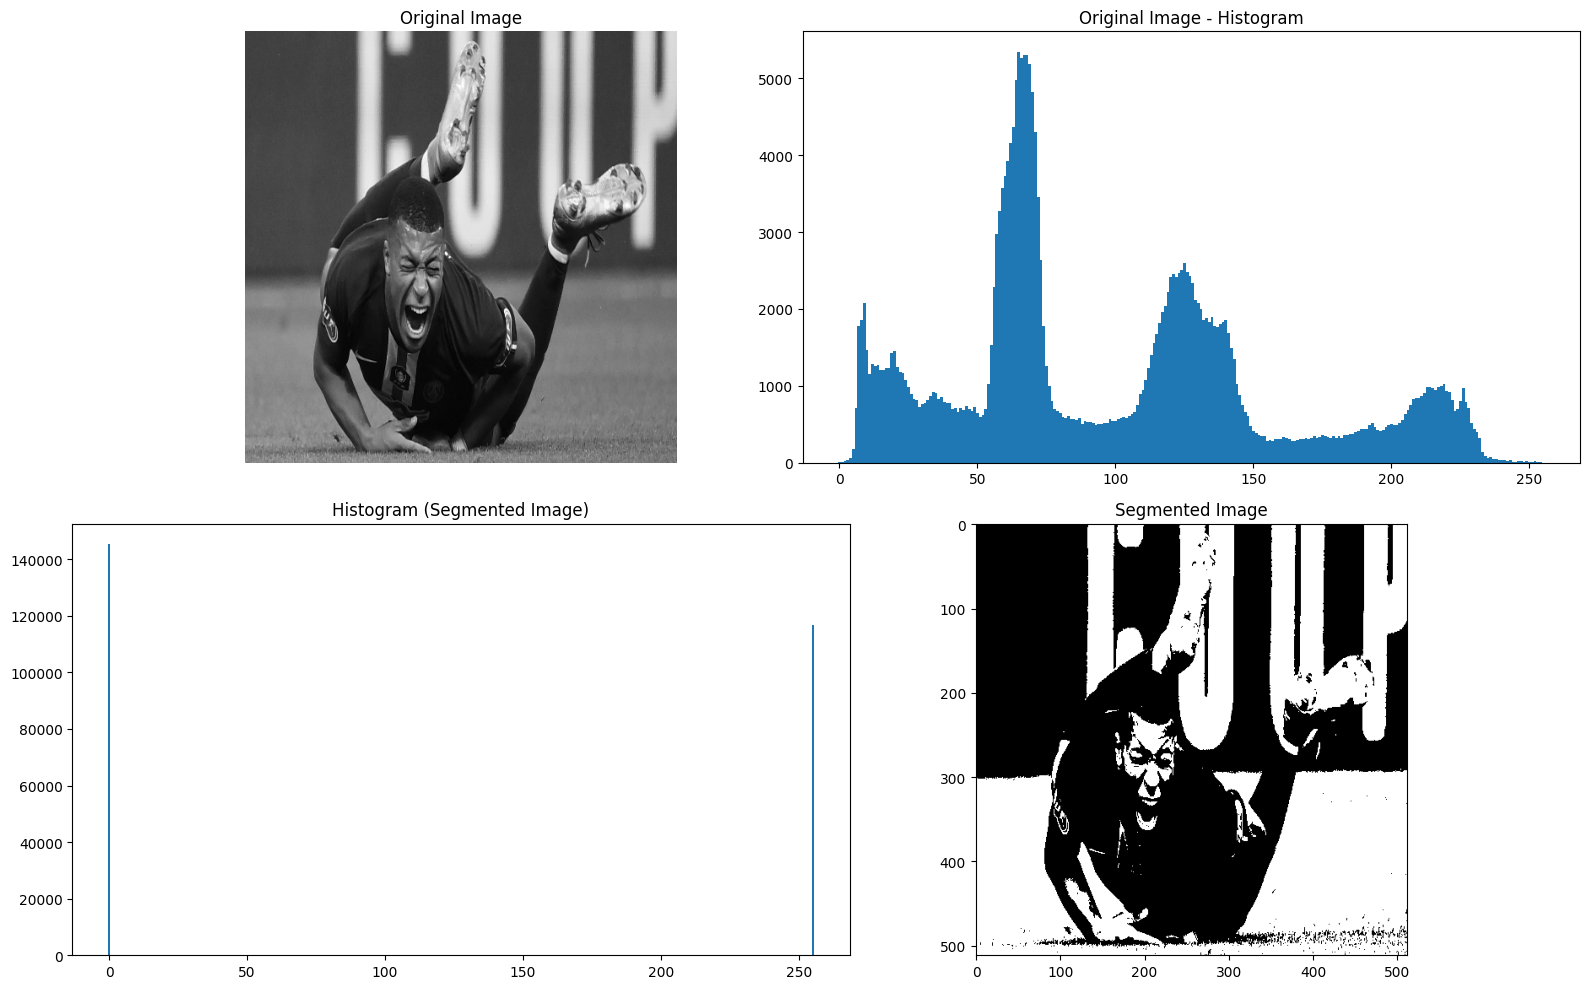

In [20]:
plt.figure(figsize=(16,10))


plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')


hist = generateHistogram(image)
plt.subplot(2, 2, 2)
plt.bar(range(256), hist, width=1.0)
plt.title("Original Image - Histogram")


segmentedImage = np.where(image > thresholdValue, 255, 0)
segmentedImage = np.uint8(segmentedImage)


segmentedImageGrayLevelCount = generateHistogram(segmentedImage)

plt.subplot(2, 2, 3)
plt.title(f"Histogram (Segmented Image)")
plt.bar(range(256), segmentedImageGrayLevelCount, width=1.0)

plt.subplot(2, 2, 4)
plt.title(f"Segmented Image")
plt.imshow(segmentedImage, cmap='gray')



plt.tight_layout()
plt.show()